Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# dataset upload
df=pd.read_csv('/content/train_data.csv')
df.head(10)

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive
5,"Kindle E-reader - White, 6 Glare-Free Touchscr...",Amazon,"Office,eBook Readers,Electronics Features,Walm...","Office Supplies,Electronics",2016-12-23T00:00:00.000Z,This is a great product. Light weight. I wish ...,You will love it,Positive
6,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-05-31T00:00:00.000Z,My 7-year old daughter saved up to by this. He...,OK For Entry Level Tablet,Neutral
7,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2016-06-05T00:00:00.000Z,Purchased this for my son. Has room to upgrade...,Great for kids or smaller needs,Positive
8,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-11-23T00:00:00.000Z,Bought this for my mom and it was just what sh...,Great tablet,Positive
9,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-05-18T00:00:00.000Z,"was cheap, can not run chrome stuff, returned ...","was cheap, can not run chrome stuff, returned",Negative


In [6]:
# dataset upload
test=pd.read_csv('//content/test_data.csv')
#test.head(10)

In [7]:
# dataset upload
test_hidden=pd.read_csv('/content/test_data_hidden.csv')
#test_hidden.head(10)

In [ ]:
test_hidden.isnull().sum()

,0
Name of the product,0
Product Brand,0
categories,0
primaryCategories,0
reviews.date,0
reviews.text,0
reviews.title,3
sentiment,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name of the product  4000 non-null   object
 1   Product Brand        4000 non-null   object
 2   categories           4000 non-null   object
 3   primaryCategories    4000 non-null   object
 4   reviews.date         4000 non-null   object
 5   reviews.text         4000 non-null   object
 6   reviews.title        3990 non-null   object
 7   sentiment            4000 non-null   object
dtypes: object(8)
memory usage: 250.1+ KB


In [ ]:
df.shape

(4000, 8)

In [ ]:
df.columns


Index(['Name of the product', 'Product Brand', 'categories',
       'primaryCategories', 'reviews.date', 'reviews.text', 'reviews.title',
       'sentiment'],
      dtype='object')

In [ ]:
#Class Imbalance Problem
df['sentiment'].value_counts()

,count
sentiment,
Positive,3749
Neutral,158
Negative,93


In [ ]:
#Exploratory Data Analysis
df.isnull().sum()

,0
Name of the product,0
Product Brand,0
categories,0
primaryCategories,0
reviews.date,0
reviews.text,0
reviews.title,10
sentiment,0


In [ ]:
df['reviews.title'].unique()

array(['Powerful tablet', 'Amazon Echo Plus AWESOME', 'Average', ...,
       'Fun toy', 'Great "dumb" speaker',
       'A great 7 inch tablet at a great price'], dtype=object)

In [ ]:
# handle null value of reviews.title by median
df['reviews.title'] = df['reviews.title'].fillna(df['reviews.title'].mode()[0])



In [ ]:
df.isnull().sum()

,0
Name of the product,0
Product Brand,0
categories,0
primaryCategories,0
reviews.date,0
reviews.text,0
reviews.title,0
sentiment,0


In [ ]:
df.describe()

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
count,4000,4000,4000,4000,4000,4000,4000,4000
unique,23,1,23,4,638,3598,2606,3
top,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-23T00:00:00.000Z,I bought this kindle for my 11yr old granddaug...,Great tablet,Positive
freq,676,4000,628,2600,99,4,110,3749


<Axes: title={'center': 'Sentiment Class Distribution'}, xlabel='sentiment'>

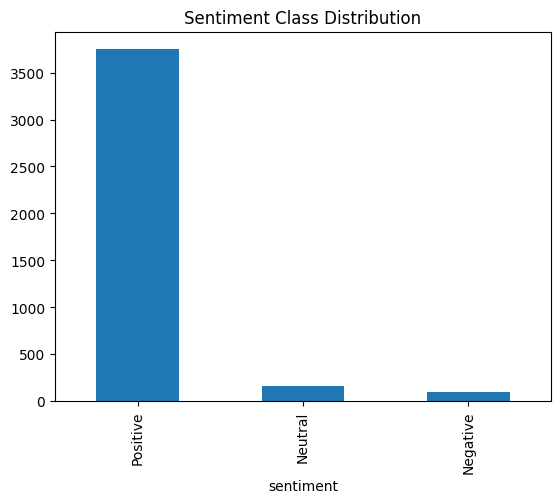

In [ ]:
df['sentiment'].value_counts().plot(kind='bar', title='Sentiment Class Distribution')


he bar chart titled "Sentiment Class Distribution" shows a highly imbalanced dataset, which is critical when building a sentiment classification model. Here are the insights:

Imbalance can mislead accuracy metrics: A model predicting only "Positive" might still get >90% accuracy but fail to classify Neutral or Negative correctly.

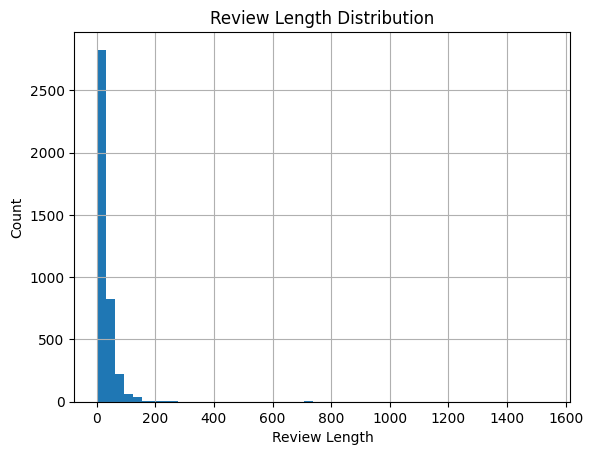

In [ ]:
df['review_length'] = df['reviews.text'].apply(lambda x: len(str(x).split()))  #Review length: number of words/characters
df['review_length'].hist(bins=50)
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()


The "Review Length Distribution" histogram gives important insights into the textual data used in your sentiment analysis.

This distribution is right-skewed, meaning the model will frequently see short texts but occasionally encounter very long ones.



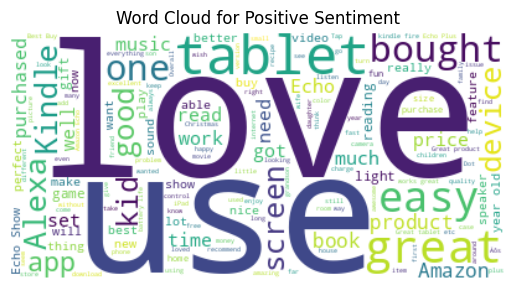

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(review for review in df[df['sentiment']=='Positive']['reviews.text'].astype(str))
wordcloud = WordCloud(background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Positive Sentiment")
plt.show()


"love" and "use" are the most dominant — indicating high user satisfaction and frequent usage.

Other big words: "tablet", "easy", "great", "screen", "device", "bought".

Positive Sentiment = Ease + Usefulness + Affordability.

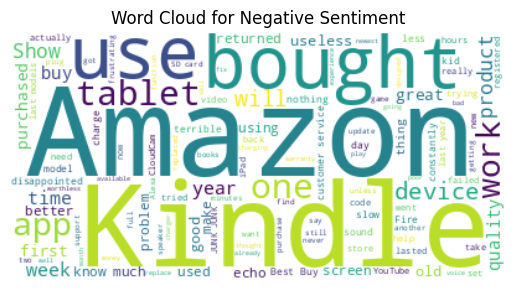

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(review for review in df[df['sentiment']=='Negative']['reviews.text'].astype(str))
wordcloud = WordCloud(background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Negative Sentiment")
plt.show()


In [ ]:
!pip install nltk
import nltk
nltk.download('wordnet')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)

# Change 'reviews.text\t' to 'reviews.text'
df['cleaned_review'] = df['reviews.text'].apply(clean_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df['cleaned_review']

,cleaned_review
0,purchased black fridaypros great price even sa...
1,purchased two amazon echo plus two dot plus fo...
2,average alexa option show thing screen still l...
3,good product exactly wanted good price
4,rd one ive purchased ive bought one niece case...
...,...
3995,fun family play may get boring newness wear we...
3996,love kindle great product reduces eye strain e...
3997,looking blutooth speaker use phone didnt want ...
3998,second amazon fire tablet purchased time color...


In [ ]:
df.head()

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment,review_length,cleaned_review
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive,72,purchased black fridaypros great price even sa...
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive,113,purchased two amazon echo plus two dot plus fo...
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral,15,average alexa option show thing screen still l...
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive,12,good product exactly wanted good price
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive,35,rd one ive purchased ive bought one niece case...


In [ ]:
df["reviews.title"].value_counts()

,count
reviews.title,
Great tablet,110
Great product,63
Love it,52
Great,49
Great for kids,43
...,...
better than a nabi 2,1
Best Kindle but not Perfect,1
Seems like its shaping up into a great set up.,1


In [ ]:
# Brand Name

# Product Type or Category

#from name of the product columns


In [ ]:
# Define known brands to look for
brands = ['Amazon', 'Fire', 'Kindle', 'Echo']

# Function to extract the first matched brand from the title
def extract_brand(name):
    for brand in brands:
        if brand.lower() in name.lower():
            return brand
    return 'Other'

# Apply the function to create a new column
df['brand'] = df['Name of the product'].apply(extract_brand)

# Display the result
print(df[['Name of the product', 'brand']])


                                    Name of the product   brand
0     All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...    Fire
1           Amazon - Echo Plus w/ Built-In Hub - Silver  Amazon
2     Amazon Echo Show Alexa-enabled Bluetooth Speak...  Amazon
3     Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...    Fire
4     Brand New Amazon Kindle Fire 16gb 7" Ips Displ...  Amazon
...                                                 ...     ...
3995        Amazon - Echo Plus w/ Built-In Hub - Silver  Amazon
3996  Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon
3997  Amazon Tap - Alexa-Enabled Portable Bluetooth ...  Amazon
3998  Brand New Amazon Kindle Fire 16gb 7" Ips Displ...  Amazon
3999  All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...    Fire

[4000 rows x 2 columns]


Text(0, 0.5, 'Count')

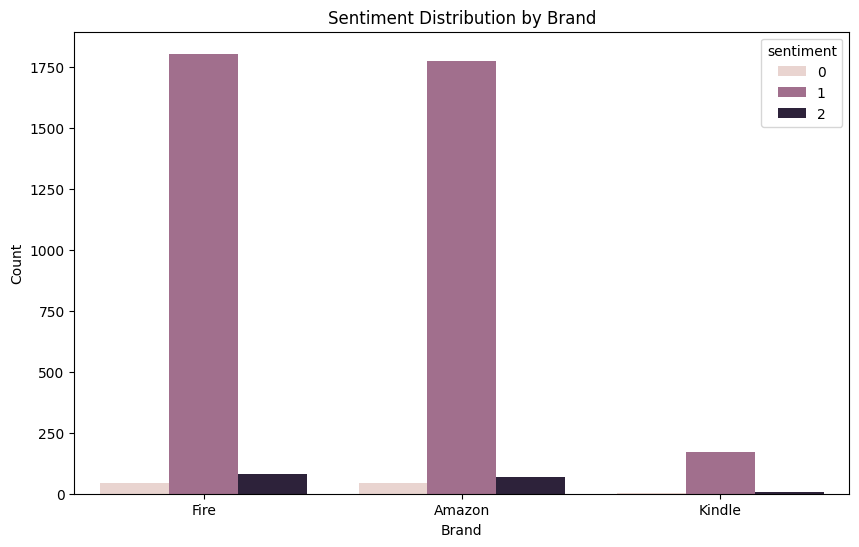

In [ ]:
#visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='brand', hue='sentiment')
plt.title('Sentiment Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')

In [ ]:
## Product Type or Category
# Define category keywords
categories = ['Tablet', 'Echo', 'Show', 'Speaker', 'Kindle', 'Display']

# Function to extract category from product name
def extract_category(name):
    for cat in categories:
        if cat.lower() in name.lower():
            return cat
    return 'Other'

# Apply the function to get category
df['category'] = df['Name of the product'].apply(extract_category)

# Display results
print(df[['Name of the product', 'category']])

                                    Name of the product category
0     All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...   Tablet
1           Amazon - Echo Plus w/ Built-In Hub - Silver     Echo
2     Amazon Echo Show Alexa-enabled Bluetooth Speak...     Echo
3     Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...   Tablet
4     Brand New Amazon Kindle Fire 16gb 7" Ips Displ...   Tablet
...                                                 ...      ...
3995        Amazon - Echo Plus w/ Built-In Hub - Silver     Echo
3996  Amazon Kindle E-Reader 6" Wifi (8th Generation...   Kindle
3997  Amazon Tap - Alexa-Enabled Portable Bluetooth ...  Speaker
3998  Brand New Amazon Kindle Fire 16gb 7" Ips Displ...   Tablet
3999  All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...   Tablet

[4000 rows x 2 columns]


Text(0, 0.5, 'Count')

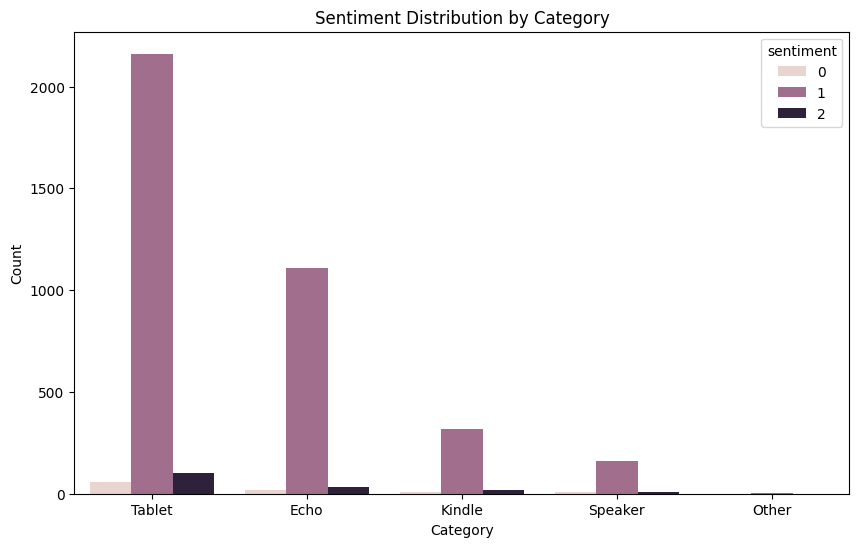

In [ ]:
#Visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category', hue='sentiment')
plt.title('Sentiment Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')

In [ ]:
#change date

df['reviews.date'] = pd.to_datetime(df['reviews.date'])

# Extract the 'reviews.date' column into a new DataFrame
date_df = pd.DataFrame(df['reviews.date'], columns=['reviews.date'])


# Examples of different formatted versions
date_df['dd_mm_yyyy'] = date_df['reviews.date'].dt.strftime('%d-%m-%Y')




In [ ]:
df['Month'] = date_df['reviews.date'].dt.strftime('%B')   # e.g., January, February
df['Year'] = date_df['reviews.date'].dt.year

In [ ]:
df['Month']

,Month
0,December
1,January
2,December
3,August
4,January
...,...
3995,December
3996,March
3997,January
3998,May


In [ ]:
df['Year']

,Year
0,2016
1,2018
2,2017
3,2017
4,2017
...,...
3995,2017
3996,2017
3997,2017
3998,2016


In [ ]:
# top 10 most frequently primary cat
df['primaryCategories'].value_counts()[:10]

,count
primaryCategories,
Electronics,2600
"Electronics,Hardware",1159
"Office Supplies,Electronics",224
"Electronics,Media",17


Text(0, 0.5, 'Count')

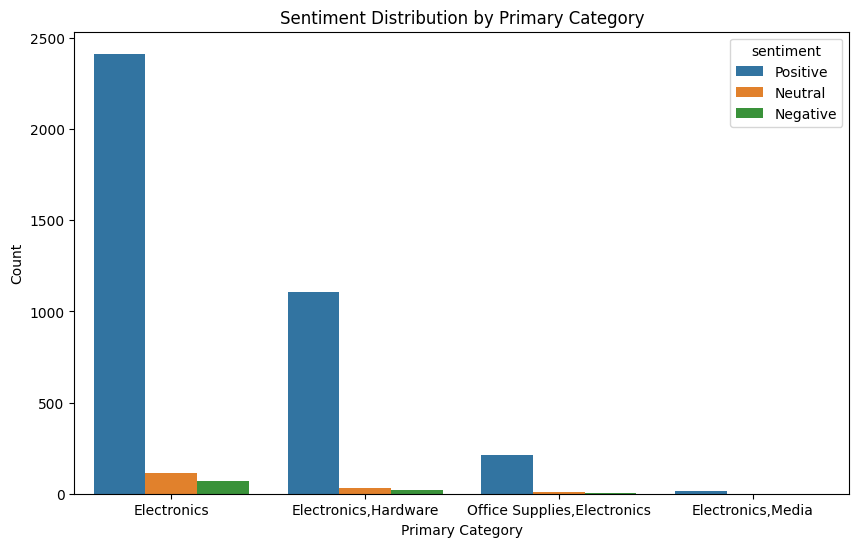

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='primaryCategories', hue='sentiment')
plt.title('Sentiment Distribution by Primary Category')
plt.xlabel('Primary Category')
plt.ylabel('Count')

Dominance of Positive Sentiment: Across all categories, positive sentiment (blue) is the overwhelming majority, suggesting high customer satisfaction or favorable reviews for these products.

Category Volume:

Electronics has the largest volume of reviews/items (2500), indicating it’s the most reviewed or popular category.

Electronics_Media has the smallest volume (50), suggesting it’s less common or less reviewed.



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

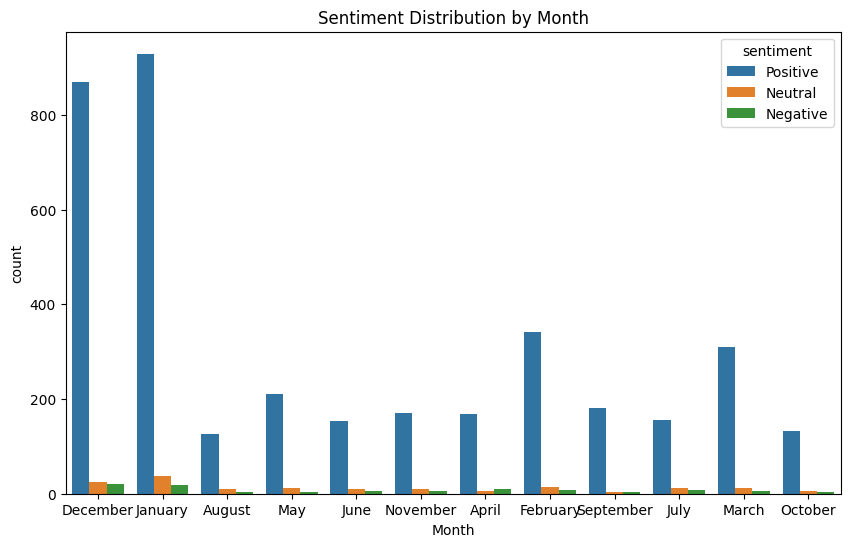

In [ ]:
#visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', hue='sentiment')
plt.title('Sentiment Distribution by Month')
plt.xlabel('Month')
plt

In [ ]:
df['reviews.date']

,reviews.date
0,2016-12-26 00:00:00+00:00
1,2018-01-17 00:00:00+00:00
2,2017-12-20 00:00:00+00:00
3,2017-08-04 00:00:00+00:00
4,2017-01-23 00:00:00+00:00
...,...
3995,2017-12-08 00:00:00+00:00
3996,2017-03-31 00:00:00+00:00
3997,2017-01-19 00:00:00+00:00
3998,2016-05-27 00:00:00+00:00


In [ ]:
date_df['dd_mm_yyyy']

,dd_mm_yyyy
0,26-12-2016
1,17-01-2018
2,20-12-2017
3,04-08-2017
4,23-01-2017
...,...
3995,08-12-2017
3996,31-03-2017
3997,19-01-2017
3998,27-05-2016


In [ ]:
#feature engineering

df['text_word_count'] = df['reviews.text'].apply(lambda x: len(str(x).split()))
df['text_char_count'] = df['reviews.text'].apply(lambda x: len(str(x)))
df['title_word_count'] = df['reviews.title'].apply(lambda x: len(str(x).split()))



In [ ]:
df['text_word_count']

,text_word_count
0,72
1,113
2,15
3,12
4,35
...,...
3995,20
3996,24
3997,124
3998,28


In [ ]:
df.head()

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment,review_length,cleaned_review,brand,category,Month,Year,text_word_count,text_char_count,title_word_count
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26 00:00:00+00:00,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive,72,purchased black fridaypros great price even sa...,Fire,Tablet,December,2016,72,409,2
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17 00:00:00+00:00,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive,113,purchased two amazon echo plus two dot plus fo...,Amazon,Echo,January,2018,113,593,4
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20 00:00:00+00:00,Just an average Alexa option. Does show a few ...,Average,Neutral,15,average alexa option show thing screen still l...,Amazon,Echo,December,2017,15,81,1
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04 00:00:00+00:00,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive,12,good product exactly wanted good price,Fire,Tablet,August,2017,12,63,1
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23 00:00:00+00:00,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive,35,rd one ive purchased ive bought one niece case...,Amazon,Tablet,January,2017,35,179,2


In [ ]:
df['text_char_count']

,text_char_count
0,409
1,593
2,81
3,63
4,179
...,...
3995,103
3996,115
3997,648
3998,147


In [ ]:
df['title_word_count']

,title_word_count
0,2
1,4
2,1
3,1
4,2
...,...
3995,2
3996,2
3997,3
3998,9


In [ ]:
!pip install textblob
from textblob import TextBlob
df['sentiment_score'] = df['reviews.text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
df['sentiment_score']

,sentiment_score
0,0.363542
1,0.458214
2,-0.140476
3,0.690000
4,0.187500
...,...
3995,-0.350000
3996,0.425000
3997,0.198214
3998,-0.010417


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   Name of the product  4000 non-null   object             
 1   Product Brand        4000 non-null   object             
 2   categories           4000 non-null   object             
 3   primaryCategories    4000 non-null   object             
 4   reviews.date         4000 non-null   datetime64[ns, UTC]
 5   reviews.text         4000 non-null   object             
 6   reviews.title        4000 non-null   object             
 7   sentiment            4000 non-null   object             
 8   review_length        4000 non-null   int64              
 9   cleaned_review       4000 non-null   object             
 10  brand                4000 non-null   object             
 11  category             4000 non-null   object             
 12  Month               

In [ ]:
# Categorical Columns (e.g. brand, category, Month, Product Brand)


In [ ]:
# from sklearn.preprocessing import LabelEncoder

# label_cols = ['Product Brand', 'brand', 'category', 'Month']
# le = LabelEncoder()

# for col in label_cols:
#     df[col + '_encoded'] = le.fit_transform(df[col])

In [ ]:
test.head()

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!


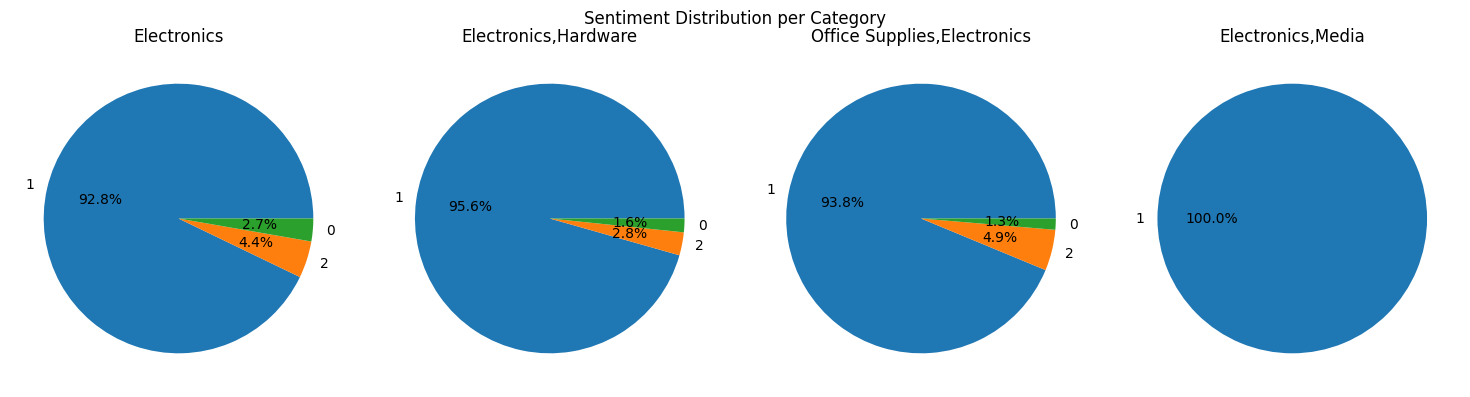

In [ ]:
# Get unique categories
categories = df['primaryCategories'].unique()

# Create a subplot for each category
fig, axes = plt.subplots(1, len(categories), figsize=(15, 4))
for i, category in enumerate(categories):
    # Filter data for the category
    category_data = df[df['primaryCategories'] == category]
    sentiment_counts = category_data['sentiment'].value_counts()

    # Plot pie chart
    axes[i].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
                colors=['#1f77b4', '#ff7f0e', '#2ca02c'])
    axes[i].set_title(category)

plt.suptitle('Sentiment Distribution per Category')
plt.tight_layout()
plt.show()

Visualize the sentiment distribution within each category as a pie chart, emphasizing the relative contribution of each sentiment type.

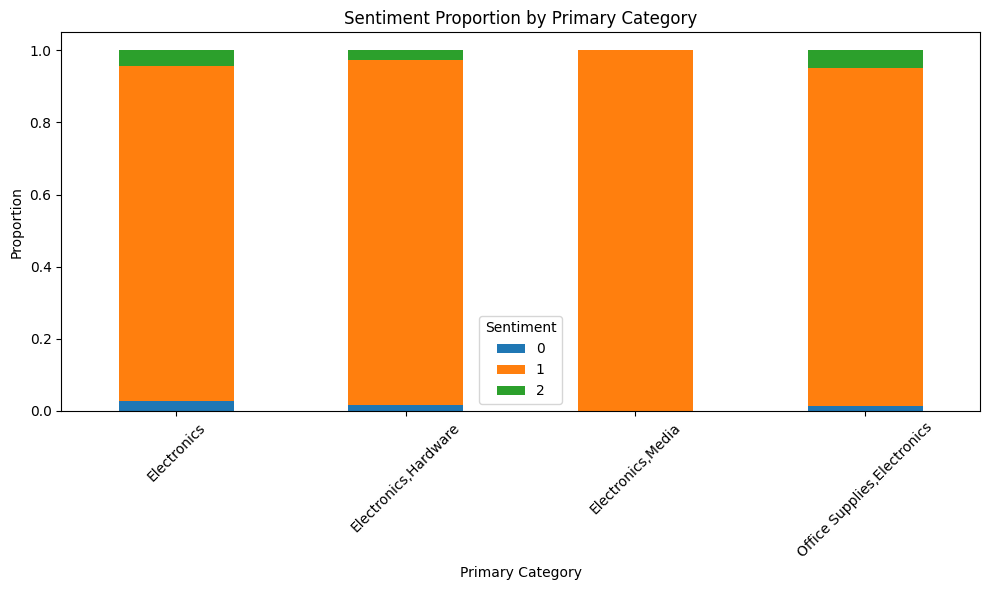

In [ ]:
# Create a cross-tabulation of counts and normalize by row (to get proportions)
sentiment_proportions = pd.crosstab(df['primaryCategories'], df['sentiment'], normalize='index')

# Plot a stacked bar chart with percentages
sentiment_proportions.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Sentiment Proportion by Primary Category')
plt.xlabel('Primary Category')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

Highlights whether the sentiment proportions are consistent across categories, regardless of volume.

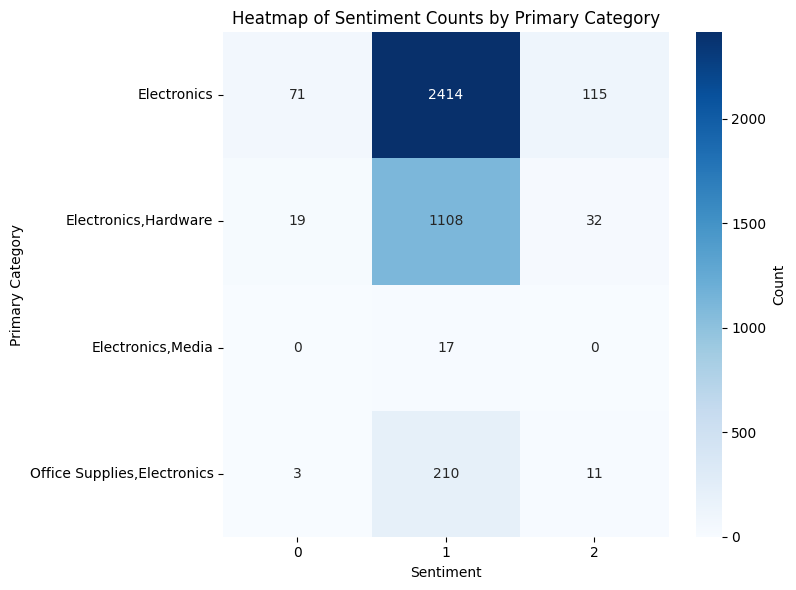

In [ ]:
# Create a cross-tabulation of counts
sentiment_counts = pd.crosstab(df['primaryCategories'], df['sentiment'])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(sentiment_counts, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Heatmap of Sentiment Counts by Primary Category')
plt.xlabel('Sentiment')
plt.ylabel('Primary Category')
plt.tight_layout()
plt.show()

In [ ]:
# Clean the review text columns from test data
test['cleaned_review'] = test['reviews.text'].apply(clean_text)


In [ ]:
test['cleaned_review']

,cleaned_review
0,amazon kindle fire lot free app used one want ...
1,echo show great addition amazon family work li...
2,great value best buy bought christmas sale
3,use mine email facebook game go line also load...
4,fantastic item person bought love
...,...
995,love alexa love able watch news briefing seein...
996,speaker pretty loud love take downside hold ho...
997,bought yr old said came gb storage actual stor...
998,told sale person could come back week receipt ...


In [ ]:
# Clean the review text columns from test_hidden data

test_hidden['cleaned_review'] = test_hidden['reviews.text'].apply(clean_text)

In [ ]:
# sentiment change in to numerical column
df['sentiment'] = df['sentiment'].map({'Positive': 1, 'Negative': 0,'Neutral':2})

In [ ]:
from sklearn.model_selection import train_test_split
x = df['cleaned_review']
y = df['sentiment']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# X_train = df.drop('cleaned_review', axis=1)
# y_train = df['cleaned_review']
# X_test = test.drop('cleaned_review', axis=1)
# y_test = test['cleaned_review']
# X_test_hidden = test_hidden.drop('cleaned_review', axis=1)
# y_test_hidden = test_hidden['cleaned_review']

In [ ]:
# TO CHECK THE DATA IMBALANCE
df['sentiment'].value_counts()

,count
sentiment,
1,3749
2,158
0,93


In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer

TfidfVectorizer()

In [ ]:
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

In [ ]:
# using smote
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_tfidf, y_train)
smote_counter = Counter(y_train_resampled)
print(smote_counter)



Counter({1: 2998, 2: 2998, 0: 2998})


In [ ]:
# Assuming x_train and y_train are your original data before TF-IDF
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Apply TF-IDF after splitting
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

# Now apply SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_tfidf, y_train)
smote_counter = Counter(y_train_resampled)
print(smote_counter)

Counter({1: 2998, 2: 2998, 0: 2998})


In [ ]:
# Assuming x_train and y_train are your original data before TF-IDF
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Handle NaN values in y_train before applying TF-IDF and SMOTE
# Here, we'll remove rows with NaN in y_train
x_train = x_train[y_train.notna()]

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
#naive baised model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
model=MultinomialNB()
model.fit(x_train_tfidf,y_train)

MultinomialNB()

In [ ]:
#evalution
y_pred=model.predict(x_test_tfidf)

In [ ]:
# accuracy
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.93875


In [ ]:
# using logistic regession
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
model_lr=LogisticRegression()
model_lr.fit(x_train_tfidf,y_train)

LogisticRegression()

In [ ]:
#evalution
y_pred=model_lr.predict(x_test_tfidf)

In [ ]:
# accuracy
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.94125


In [ ]:
# using svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
model_svm=SVC()
model_svm.fit(x_train_tfidf,y_train)

SVC()

In [ ]:
#evalution
y_pred=model_svm.predict(x_test_tfidf)

In [ ]:
#accuracy
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.94625


In [ ]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.23      0.38        13
           1       0.95      1.00      0.97       751
           2       1.00      0.08      0.15        36

    accuracy                           0.95       800
   macro avg       0.98      0.44      0.50       800
weighted avg       0.95      0.95      0.93       800



In [ ]:
#ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



In [ ]:
# #ROC
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc

# fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# roc_auc = auc(fpr, tpr)

# # Plot
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.grid(True)
# plt.show()



In [ ]:
#LSTM
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
# Remove the standalone Keras imports and use tf.keras instead:
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.models import Sequential
# from keras.layers import Embedding, LSTM, Dense
# from keras.utils import to_categorical

In [ ]:
model_dp=Sequential()
model_dp.add(Embedding(input_dim=10000,output_dim=128,input_length=100))
model_dp.add(LSTM(units=64))
model_dp.add(Dense(units=3,activation='softmax'))


In [ ]:
#compile the model
model_dp.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#compile the model
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.preprocessing import LabelBinarizer

# Assuming x_train and y_train are your original data before SMOTE
# 1. Tokenize the text data
tokenizer = Tokenizer(num_words=10000)  # Adjust num_words as needed
tokenizer.fit_on_texts(x_train)
x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_test_sequences = tokenizer.texts_to_sequences(x_test)

# 2. Pad sequences to a fixed length
max_length = 100  # Adjust max_length as needed
x_train_padded = pad_sequences(x_train_sequences, maxlen=max_length)
x_test_padded = pad_sequences(x_test_sequences, maxlen=max_length)

# 3. One-hot encode the target variable
# Instead of to_categorical, using LabelBinarizer for flexibility
encoder = LabelBinarizer()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# 4. Apply SMOTE to the padded and encoded data
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_padded, y_train_encoded)

# 5. Now you can fit your LSTM model
model_dp = Sequential()
model_dp.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length))
model_dp.add(LSTM(units=64))
model_dp.add(Dense(units=3, activation='softmax'))  # Assuming 3 sentiment classes

model_dp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_dp.fit(x_train_resampled, y_train_resampled, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 25s 97ms/step - accuracy: 0.5480 - loss: 0.9528 - val_accuracy: 0.0000e+00 - val_loss: 1.6489
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 23s 100ms/step - accuracy: 0.7320 - loss: 0.6548 - val_accuracy: 0.0873 - val_loss: 1.6699
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 22s 96ms/step - accuracy: 0.8091 - loss: 0.4894 - val_accuracy: 0.2034 - val_loss: 1.7195
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - accuracy: 0.8583 - loss: 0.3708 - val_accuracy: 0.3207 - val_loss: 1.7605
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 22s 97ms/step - accuracy: 0.9161 - loss: 0.2436 - val_accuracy: 0.3118 - val_loss: 2.0918


In [ ]:
# accuracy
loss, accuracy = model_dp.evaluate(x_test_padded, y_test_encoded)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7818 - loss: 0.7122
Test Loss: 0.7828815579414368, Test Accuracy: 0.768750011920929


In [ ]:
#dump the model
import pickle
pickle.dump(model_svm,open('model.pkl','wb'))



In [ ]:
#dump vector file
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Separate features and target
X_train = df.drop('reviews.text', axis=1)
y_train = df['reviews.text']
X_test = test.drop('reviews.text', axis=1)
y_test = test['reviews.text']
X_test_hidden = test_hidden.drop('reviews.text', axis=1)
y_test_hidden = test_hidden['reviews.text']



In [ ]:
# Identify numerical and categorical features
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=np.number).columns.tolist()

# Create preprocessing pipelines for numerical and categorical data
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Or use 'constant' with a fill_value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # handle_unknown='ignore' for unseen values in test data
])

# Combine the pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Create a pipeline with preprocessing and model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])



In [3]:
# Hyperparameter tuning (adjust parameters as needed)
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}

# Use ShuffleSplit instead of StratifiedKFold to avoid the error
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)  # Fit on the original training data

# Get the best model and evaluate
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy}")